<a href="https://colab.research.google.com/github/vrinda01go/CNN-based-Stock-Market-Prediction/blob/main/Stock_Market_Prediction_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q yfinance

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime


In [6]:
df=pd.read_csv('portfolio_data.csv',parse_dates=['Date'],index_col=['Date'])
df1=df[['AMZN']]
df1

,AMZN
Date,
2013-05-01,248.229996
2013-05-02,252.550003
2013-05-03,258.049988
2013-05-06,255.720001
2013-05-07,257.730011
...,...
2019-05-08,1917.770020
2019-05-09,1899.869995
2019-05-10,1889.979980


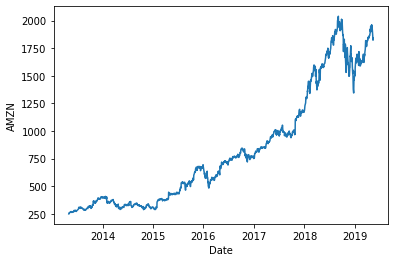

In [7]:
plt.xlabel('Date')
plt.ylabel('AMZN')
plt.plot(df1)

**Augmented Dickey-Fuller Test**: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

In [8]:
result = adfuller(df1['AMZN'])
result
print('p-value: {}'.format(result[1]))
print('ADF Statistics:{}'.format(result[0]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


p-value: 0.9864159495725892
ADF Statistics:0.55365991233002
Critical Values:
	1%: -3.434731647915545
	5%: -2.8634752174058944
	10%: -2.5678002869095424


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.


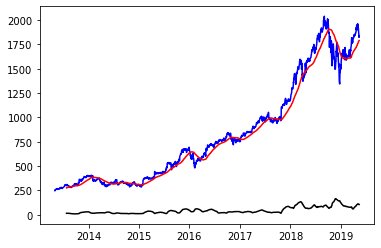

In [9]:
rolling_mean = df1.rolling(window = 60).mean()
rolling_std = df1.rolling(window = 60).std()

plt.plot(df1['AMZN'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')


the rolling mean and rolling standard deviation increase with time. Therefore, we can conclude that the time series is not stationary.

In [11]:
result = seasonal_decompose(df1, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

TypeError: ignored

No handles with labels found to put in legend.


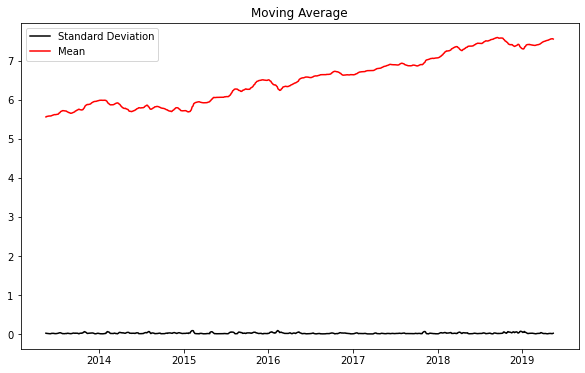

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df1)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

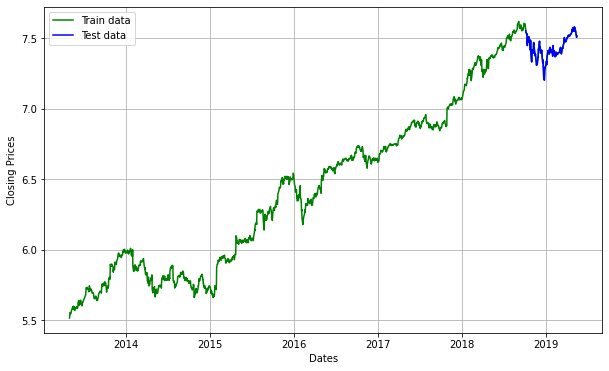

In [14]:
train_data, test_data = df_log[:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

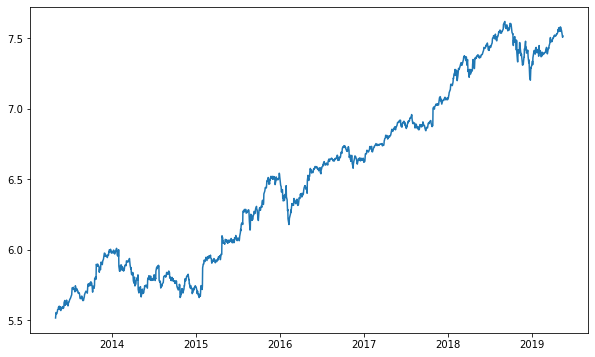

In [15]:
df_log=np.log(df1['AMZN'])
plt.plot(df_log)

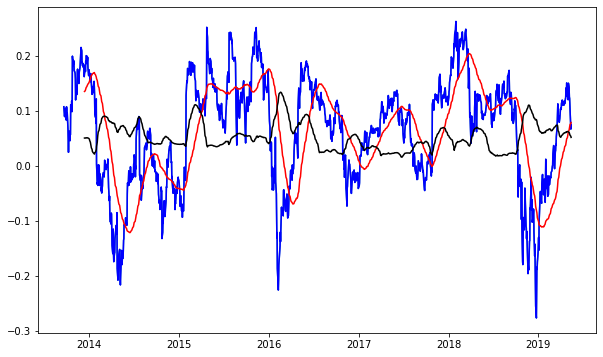

In [16]:
rolling_mean = df_log.rolling(window=100).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
plt.plot(df_log_minus_mean)

rolling_mean = df_log_minus_mean.rolling(window = 60).mean()
rolling_std = df_log_minus_mean.rolling(window = 60).std()

plt.plot(df_log_minus_mean, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')


In [29]:
result = adfuller(df_log_minus_mean)
result
print('p-value: {}'.format(result[1]))
print('ADF Statistics:{}'.format(result[0]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

p-value: 0.0038557411487860458
ADF Statistics:-3.7188461755046003
Critical Values:
	1%: -3.4349634933241084
	5%: -2.8635775363009244
	10%: -2.5678547733584605


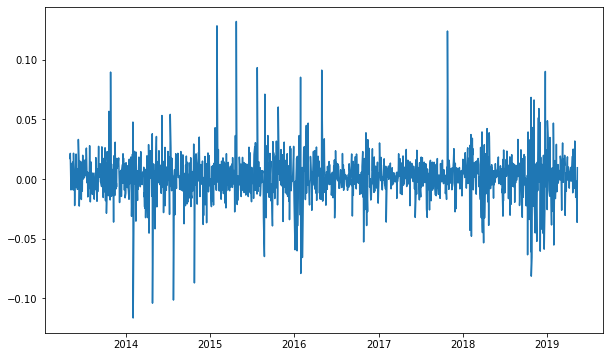

In [18]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
plt.plot(df_log_shift)

In [ ]:
result = adfuller(df_log_shift)
result
print('p-value: {}'.format(result[1]))
print('ADF Statistics:{}'.format(result[0]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

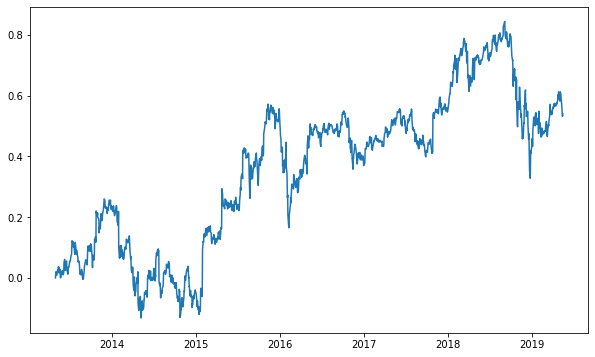

In [20]:
rolling_mean_exp_decay = df_log.ewm(halflife=365, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
plt.plot(df_log_exp_decay)

In [21]:
result = adfuller(df_log_exp_decay)
result
print('p-value: {}'.format(result[1]))
print('ADF Statistics:{}'.format(result[0]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

p-value: 0.4104884952758821
ADF Statistics:-1.7402781246237635
Critical Values:
	1%: -3.4346623009329513
	5%: -2.8634446113978034
	10%: -2.5677839889683494


In [22]:
df_log = pd.DataFrame(df_log)
df_log.columns

Index(['AMZN'], dtype='object')

In [30]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(df_log_minus_mean, order=(1,1,1))
results = model.fit()
plt.plot(df_log)
plt.plot(results.fittedvalues, color='red')

ValueError: ignored

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['AMZN'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)